In [144]:
#Dependencies
import pandas as pd
import csv
import numpy as np
import os



In [145]:
# Load the csv into a DataFrame
df = pd.read_csv("Resources/Listings.csv", encoding='unicode_escape', dtype={"host_response_time":object, "district": object})
df.head()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [146]:
df.columns

Index(['listing_id', 'name', 'host_id', 'host_since', 'host_location',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'district', 'city', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bedrooms', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable'],
      dtype='object')

In [147]:
#Convert host_since to date time so we can find the min date and the max date
df["host_since"] = pd.to_datetime(df["host_since"])

In [148]:
df["host_since"].min()

Timestamp('2008-08-12 00:00:00')

In [149]:
df["host_since"].max()

Timestamp('2021-02-26 00:00:00')

In [150]:
df_pandemic = df[['listing_id', 'host_id', 'host_since', 'host_location',
                  'host_total_listings_count', 'neighbourhood', 'city', 'price']]
df_pandemic

,listing_id,host_id,host_since,host_location,host_total_listings_count,neighbourhood,city,price
0,281420,1466919,2011-12-03,"Paris, Ile-de-France, France",1.0,Buttes-Montmartre,Paris,53
1,3705183,10328771,2013-11-29,"Paris, Ile-de-France, France",1.0,Buttes-Montmartre,Paris,120
2,4082273,19252768,2014-07-31,"Paris, Ile-de-France, France",1.0,Elysee,Paris,89
3,4797344,10668311,2013-12-17,"Paris, Ile-de-France, France",1.0,Vaugirard,Paris,58
4,4823489,24837558,2014-12-14,"Paris, Ile-de-France, France",1.0,Passy,Paris,60
...,...,...,...,...,...,...,...,...
279707,38338635,31161181,2015-04-13,"Paris, Ile-de-France, France",1.0,Observatoire,Paris,120
279708,38538692,10294858,2013-11-27,"Paris, Ile-de-France, France",1.0,Buttes-Montmartre,Paris,60
279709,38683356,2238502,2012-04-27,"Paris, Ile-de-France, France",1.0,Buttes-Montmartre,Paris,50
279710,39659000,38633695,2015-07-16,"Paris, Ile-de-France, France",1.0,Popincourt,Paris,105


In [151]:
df_pandemic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   listing_id                 279712 non-null  int64         
 1   host_id                    279712 non-null  int64         
 2   host_since                 279547 non-null  datetime64[ns]
 3   host_location              278872 non-null  object        
 4   host_total_listings_count  279547 non-null  float64       
 5   neighbourhood              279712 non-null  object        
 6   city                       279712 non-null  object        
 7   price                      279712 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 17.1+ MB


In [152]:
#drop null values
df_pandemic = df_pandemic.dropna()

In [153]:
#confirm null rows we're dropped
df_pandemic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 278872 entries, 0 to 279711
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   listing_id                 278872 non-null  int64         
 1   host_id                    278872 non-null  int64         
 2   host_since                 278872 non-null  datetime64[ns]
 3   host_location              278872 non-null  object        
 4   host_total_listings_count  278872 non-null  float64       
 5   neighbourhood              278872 non-null  object        
 6   city                       278872 non-null  object        
 7   price                      278872 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 19.1+ MB


In [154]:
df_pandemic

,listing_id,host_id,host_since,host_location,host_total_listings_count,neighbourhood,city,price
0,281420,1466919,2011-12-03,"Paris, Ile-de-France, France",1.0,Buttes-Montmartre,Paris,53
1,3705183,10328771,2013-11-29,"Paris, Ile-de-France, France",1.0,Buttes-Montmartre,Paris,120
2,4082273,19252768,2014-07-31,"Paris, Ile-de-France, France",1.0,Elysee,Paris,89
3,4797344,10668311,2013-12-17,"Paris, Ile-de-France, France",1.0,Vaugirard,Paris,58
4,4823489,24837558,2014-12-14,"Paris, Ile-de-France, France",1.0,Passy,Paris,60
...,...,...,...,...,...,...,...,...
279707,38338635,31161181,2015-04-13,"Paris, Ile-de-France, France",1.0,Observatoire,Paris,120
279708,38538692,10294858,2013-11-27,"Paris, Ile-de-France, France",1.0,Buttes-Montmartre,Paris,60
279709,38683356,2238502,2012-04-27,"Paris, Ile-de-France, France",1.0,Buttes-Montmartre,Paris,50
279710,39659000,38633695,2015-07-16,"Paris, Ile-de-France, France",1.0,Popincourt,Paris,105


In [155]:
#During Pandemic dataframe
start_date_during = "2020-03-11"
end_date_during = "2021-02-26"
df_pandemic_during = df_pandemic.loc[((df_pandemic["host_since"]<=end_date_during) & (df_pandemic["host_since"]>=start_date_during))]
df_pandemic_during.head()


,listing_id,host_id,host_since,host_location,host_total_listings_count,neighbourhood,city,price
571,5810710,349213863,2020-06-08,"Paris, Ile-de-France, France",1.0,Popincourt,Paris,90
2514,44643100,361343831,2020-08-09,"Paris, Ile-de-France, France",1.0,Palais-Bourbon,Paris,80
2630,43720731,349288980,2020-06-09,"Paris, Ile-de-France, France",1.0,Batignolles-Monceau,Paris,92
2631,44158654,355362462,2020-07-10,"Paris, Ile-de-France, France",1.0,Buttes-Chaumont,Paris,82
2651,45629965,369647609,2020-09-28,"Paris, Ile-de-France, France",1.0,Popincourt,Paris,80


In [156]:
#Verify the min and max dates
print(df_pandemic_during["host_since"].min())
print(df_pandemic_during["host_since"].max())


2020-03-11 00:00:00
2021-02-26 00:00:00


In [157]:
#1 year before Pandemic dataframe
start_date_one_before = "2019-03-11"
end_date_one_before = "2020-02-26"
df_pandemic_one_before = df_pandemic.loc[((df_pandemic["host_since"]<=end_date_one_before) & (df_pandemic["host_since"]>=start_date_one_before))]
df_pandemic_one_before.head()

,listing_id,host_id,host_since,host_location,host_total_listings_count,neighbourhood,city,price
91,35543595,267414503,2019-06-09,"Paris, Ile-de-France, France",1.0,Buttes-Montmartre,Paris,45
99,40673335,315461678,2019-12-08,"Paris, Ile-de-France, France",1.0,Louvre,Paris,300
177,33788676,254853853,2019-04-11,"Paris, Ile-de-France, France",1.0,Reuilly,Paris,67
178,33789971,254573117,2019-04-10,"Paris, Ile-de-France, France",1.0,Popincourt,Paris,113
252,40646480,315193802,2019-12-07,"Paris, Ile-de-France, France",1.0,Popincourt,Paris,125


In [158]:
#2 years before Pandemic dataframe
start_date_two_before = "2018-03-11"
end_date_two_before = "2019-02-26"
df_pandemic_two_before = df_pandemic.loc[((df_pandemic["host_since"]<=end_date_two_before) & (df_pandemic["host_since"]>=start_date_two_before))]
df_pandemic_two_before.head()

,listing_id,host_id,host_since,host_location,host_total_listings_count,neighbourhood,city,price
61,25439485,192032202,2018-05-28,"Paris, Ile-de-France, France",1.0,Popincourt,Paris,45
68,30347838,190452933,2018-05-19,"Paris, Ile-de-France, France",1.0,Batignolles-Monceau,Paris,90
69,30583783,208645243,2018-08-10,"Paris, Ile-de-France, France",1.0,Batignolles-Monceau,Paris,90
74,32539506,185197774,2018-04-19,"Paris, Ile-de-France, France",1.0,Buttes-Montmartre,Paris,120
75,32571299,243868011,2019-02-18,"Paris, Ile-de-France, France",1.0,Buttes-Montmartre,Paris,115


In [159]:
count_during = df_pandemic_during["host_since"].count()
count_one_before = df_pandemic_one_before["host_since"].count()
count_two_before = df_pandemic_two_before["host_since"].count()

print(f"The number of new hosts during the pandemic was {count_during}")
print(f"The number of new hosts 1 year before the pandemic was {count_one_before}")
print(f"The number of new hosts 2 years before the pandemic was {count_two_before}")


The number of new hosts during the pandemic was 12724
The number of new hosts 1 year before the pandemic was 31113
The number of new hosts 2 years before the pandemic was 26423


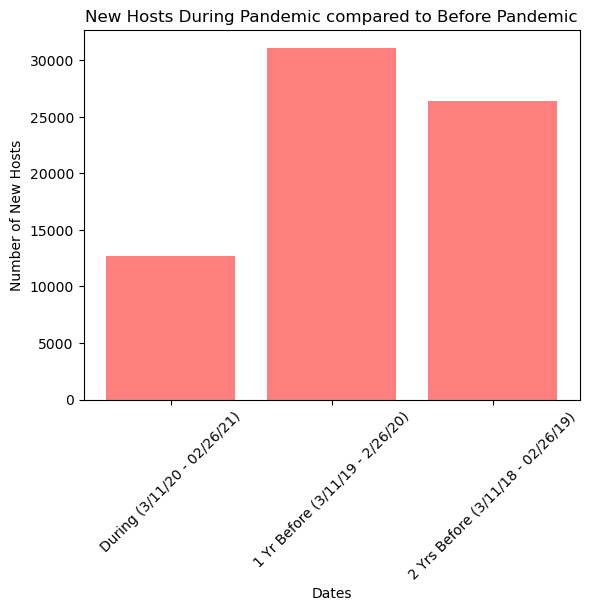

<Figure size 640x480 with 0 Axes>

In [160]:
import matplotlib.pyplot as plt

x_axis = ["2020-03-11:2021-02-26","2019-03-11 to 2020-02-26","2018-03-11 to 2019-02-26" ]
y_axis = [count_during, count_one_before, count_two_before]

plt.bar(x_axis, y_axis, color='r', alpha=0.5, align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["During (3/11/20 - 02/26/21)","1 Yr Before (3/11/19 - 2/26/20)",
                            "2 Yrs Before (3/11/18 - 02/26/19)"], rotation = 45)

plt.title("New Hosts During Pandemic compared to Before Pandemic")
plt.xlabel("Dates")
plt.ylabel("Number of New Hosts")

plt.show()
plt.tight_layout()




In [ ]:
#Based on the analysis of 3 years with the date range 03/11 - 02/26, the amount of new hosts that joined
#airbnb during the pandemic was almost half the amount of new hosts that joined in years prior.


In [164]:
city_count_during = df_pandemic_during.groupby(["city"])["host_since"].count()
city_count_one_before = df_pandemic_one_before.groupby(["city"])["host_since"].count()
city_count_two_before = df_pandemic_two_before.groupby(["city"])["host_since"].count()

print(f"The number of new hosts renting a place in each of the cities during the pandemic was {city_count_during}")
print(f"The number of new hosts, renting a place in each of the cities, 1 year before the pandemic was {city_count_one_before}")
print(f"The number of new hosts, renting a place in each of the cities, 2 years before the pandemic was {city_count_two_before}")



The number of new hosts renting a place in each of the cities during the pandemic was city
Bangkok            613
Cape Town          627
Hong Kong          383
Istanbul          3272
Mexico City       1197
New York          1616
Paris             2261
Rio de Janeiro    1372
Rome               729
Sydney             654
Name: host_since, dtype: int64
The number of new hosts, renting a place in each of the cities, 1 year before the pandemic was city
Bangkok           3126
Cape Town         1928
Hong Kong          538
Istanbul          5496
Mexico City       2611
New York          3616
Paris             6058
Rio de Janeiro    2244
Rome              2678
Sydney            2818
Name: host_since, dtype: int64
The number of new hosts, renting a place in each of the cities, 2 years before the pandemic was city
Bangkok           3007
Cape Town         1883
Hong Kong          730
Istanbul          3577
Mexico City       2797
New York          2660
Paris             4210
Rio de Janeiro    1939
Ro

In [167]:
df_pandemic["city"].unique()

array(['Paris', 'New York', 'Bangkok', 'Rio de Janeiro', 'Sydney',
       'Istanbul', 'Rome', 'Hong Kong', 'Mexico City', 'Cape Town'],
      dtype=object)

In [181]:
df1 = pd.DataFrame(city_count_during)
df2 = pd.DataFrame(city_count_one_before)
df3 = pd.DataFrame(city_count_two_before)
df_city_combined = pd.merge(df1,df2, on="city")
df_city_combined_final = pd.merge(df_city_combined,df3,on='city')
df_city_combined_final


,host_since_x,host_since_y,host_since
city,,,
Bangkok,613,3126,3007
Cape Town,627,1928,1883
Hong Kong,383,538,730
Istanbul,3272,5496,3577
Mexico City,1197,2611,2797
New York,1616,3616,2660
Paris,2261,6058,4210
Rio de Janeiro,1372,2244,1939
Rome,729,2678,2769


In [194]:
df_city_combined_final = df_city_combined_final.rename(columns={"host_since_x":"During (3/11/20 - 02/26/21)", 
                                                                "host_since_y":"1 Yr Before (3/11/19 - 2/26/20)", 
                                                                "host_since":"2 Yrs Before (3/11/18 - 02/26/19)"})
df_city_combined_final

,During,1 Year Before,2 Years Before
city,,,
Bangkok,613,3126,3007
Cape Town,627,1928,1883
Hong Kong,383,538,730
Istanbul,3272,5496,3577
Mexico City,1197,2611,2797
New York,1616,3616,2660
Paris,2261,6058,4210
Rio de Janeiro,1372,2244,1939
Rome,729,2678,2769


<Axes: xlabel='city'>

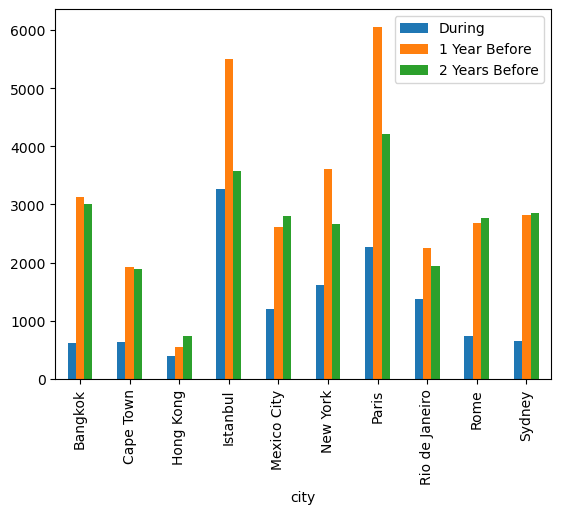

In [188]:
df_city_combined_final.plot(kind="bar")